# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. Implementation

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# -------------------------------------------------------------------------------------------------------------

# Deep Neural Networks

In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib as plt
import copy
from collections import namedtuple, deque
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,7)})

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):

    def __init__(self, state_size, action_size, seed, fc1_units=128, fc2_units=128, lr=0.002):

        super(Actor, self).__init__()
        self.state_size = state_size
        self.seed = torch.manual_seed(seed)

        self.bn1 = nn.BatchNorm1d(state_size)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.dr1 = nn.Dropout(p=0.1)

        self.bn2 = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.dr2 = nn.Dropout(p=0.1)

        self.bn3 = nn.BatchNorm1d(fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.dr3 = nn.Dropout(p=0.1)
        
        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.to(device)
        
        self.reset_parameters()

        
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        
        if len(state) == self.state_size:
            state = state.unsqueeze(0)
        
        x = self.dr1(F.relu(self.fc1(self.bn1(state))))
        x = self.dr2(F.relu(self.fc2(self.bn2(x))))
        return self.dr3(F.tanh(self.fc3(self.bn3(x))))
        

class Critic(nn.Module):

    def __init__(self, state_size, action_size, seed, fcs1_units=128, fc2_units=128, lr=0.002):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.bns = nn.BatchNorm1d(fcs1_units)

        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.dr1 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(fc2_units, 1)
        
        self.optimizer = optim.Adam(self.parameters(), lr=lr, weight_decay=0)
        self.loss = nn.MSELoss()
        self.to(device)
                
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        xs = F.relu(self.fcs1(state))
        xs = self.bns(xs)
        x = torch.cat((xs, action), dim=1)
        x = self.dr1(F.relu(self.fc2(x)))
        return self.fc3(x)       

# Replay Buffer

In [16]:
class ReplayBuffer:

    def __init__(self, action_size, buffer_size, batch_size, seed):

        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        return len(self.memory)

# OUNoise

In [17]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.size = size
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.normal(0, 1, self.size)
        self.state = x + dx
        return self.state

# Agent

In [18]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 2e-3         # learning rate of the actor 
LR_CRITIC = 2e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

ACTOR_UNITS_l1 = 128    # DNN layers units
ACTOR_UNITS_l2 = 128
CRITIC_UNITS_l1 = 128
CRITIC_UNITS_l2 = 128

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agents():
    
    def __init__(self, state_size, action_size, num_agents, random_seed):

        self.state_size = state_size
        self.action_size = action_size
        self.num_agents = num_agents
        self.seed = random.seed(random_seed)

        # Actor Network
        self.actor_local = Actor(state_size, action_size, random_seed, ACTOR_UNITS_l1, ACTOR_UNITS_l2, lr=LR_ACTOR).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed, ACTOR_UNITS_l1, ACTOR_UNITS_l2, lr=LR_ACTOR).to(device)

        # Critic Network
        self.critic_local = Critic(state_size, action_size, random_seed, CRITIC_UNITS_l1, CRITIC_UNITS_l2, lr=LR_CRITIC).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed, CRITIC_UNITS_l1, CRITIC_UNITS_l2, lr=LR_CRITIC).to(device)
        
        self.noise = OUNoise((num_agents, action_size), random_seed)

        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    

    def step(self, states, actions, rewards, next_states, dones):
 
        for i in range(self.num_agents):
            self.memory.add(states[i,:], actions[i,:], rewards[i], next_states[i,:], dones[i])

        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, states, add_noise=True):
        states = torch.from_numpy(states).float().to(device)
        actions = np.zeros((self.num_agents, self.action_size))
        
        self.actor_local.eval()
        with torch.no_grad():
            for num, state in enumerate(states):
                actions[num,:] = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            actions += self.noise.sample()
        return np.clip(actions, -1, 1)

    def reset_noise(self):
        self.noise.reset()

    def learn(self, experiences, gamma):

        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- CRITIC ---------------------------- #
         # 1) Calculate Y for target
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)

        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        
        # 2) Process critic backpropagation
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        self.critic_local.optimizer.zero_grad()
        critic_loss.backward()
        self.critic_local.optimizer.step()

        # ---------------------------- ACTOR ---------------------------- #
        # 3) Process actor backpropagation
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        
        self.actor_local.optimizer.zero_grad()
        actor_loss.backward()
        self.actor_local.optimizer.step()

        # 4) Update target networks parameters
        self.update(self.critic_local, self.critic_target, TAU)
        self.update(self.actor_local, self.actor_target, TAU) 
                    

    def update(self, local_model, target_model, tau):

        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def save_model(self):
        torch.save(self.actor_local.state_dict(), 'trained_actor_model.pth')
        torch.save(self.critic_local.state_dict(), 'trained_critic_model.pth')
        
    def load_model(self):
        self.actor_local.load_state_dict(torch.load('trained_actor_model.pth'))
        self.actor_local.eval()
        self.critic_local.load_state_dict(torch.load('trained_critic_model.pth'))
        self.critic_local.eval()


# Train

In [21]:
GAMES = 300
MAX_T = 1000
samples = 100

scores_deque = deque(maxlen=samples)
scores = []
average = []

agents = Agents(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

for episode in range(1, GAMES+1):
    
    env_info = env.reset(train_mode=True)[brain_name]         # reset the environment
    states = env_info.vector_observations                     # get the current state
   
    agents.reset_noise()
    score = np.zeros(num_agents)
    
    for t in range(max_t):
             
        actions = agents.act(states)                           # select an action
        env_info = env.step(actions)[brain_name]               # send the action to the environment
        next_states = env_info.vector_observations             # get the next states
        rewards = env_info.rewards                             # get the rewards
        dones = env_info.local_done                            # see if the episode has finished for any agent

        agents.step(states, actions, rewards, next_states, dones)

        states = next_states
        score += rewards
        
        if np.any(dones):
            break 
            
    scores_deque.append(np.mean(score))
    scores.append(np.mean(score))
    average.append(np.mean(scores_deque))
      
    if episode % 1 == 0 and episode != 0:
        print('Game {0}  --->  Avg Reward: {1}  ---> Reward: {2}'.format(episode, round(np.mean(scores_deque), 2), round(np.mean(score), 2), end=""))
    if episode % 10 == 0 and episode != 0:
        agents.save_model()
    
average_dt = pd.DataFrame(average, columns=['Reward'])
scores_dt = pd.DataFrame(scores, columns=['Reward'])

Game 1  --->  Avg Reward: 0.9  ---> Reward: 0.9
Game 2  --->  Avg Reward: 0.72  ---> Reward: 0.54
Game 3  --->  Avg Reward: 0.7  ---> Reward: 0.66
Game 4  --->  Avg Reward: 0.77  ---> Reward: 0.97
Game 5  --->  Avg Reward: 0.79  ---> Reward: 0.88
Game 6  --->  Avg Reward: 0.81  ---> Reward: 0.93
Game 7  --->  Avg Reward: 0.82  ---> Reward: 0.89
Game 8  --->  Avg Reward: 0.87  ---> Reward: 1.16
Game 9  --->  Avg Reward: 0.87  ---> Reward: 0.87
Game 10  --->  Avg Reward: 0.85  ---> Reward: 0.74
Game 11  --->  Avg Reward: 0.87  ---> Reward: 1.01
Game 12  --->  Avg Reward: 0.89  ---> Reward: 1.16
Game 13  --->  Avg Reward: 0.96  ---> Reward: 1.78
Game 14  --->  Avg Reward: 1.02  ---> Reward: 1.81
Game 15  --->  Avg Reward: 1.05  ---> Reward: 1.49
Game 16  --->  Avg Reward: 1.13  ---> Reward: 2.26
Game 17  --->  Avg Reward: 1.24  ---> Reward: 2.98
Game 18  --->  Avg Reward: 1.33  ---> Reward: 2.88
Game 19  --->  Avg Reward: 1.44  ---> Reward: 3.44
Game 20  --->  Avg Reward: 1.51  ---> Rewar

Game 157  --->  Avg Reward: 34.58  ---> Reward: 34.76
Game 158  --->  Avg Reward: 34.55  ---> Reward: 33.48
Game 159  --->  Avg Reward: 34.51  ---> Reward: 32.99
Game 160  --->  Avg Reward: 34.47  ---> Reward: 33.7
Game 161  --->  Avg Reward: 34.46  ---> Reward: 35.51
Game 162  --->  Avg Reward: 34.45  ---> Reward: 35.44


KeyboardInterrupt: 

In [22]:
data = {'rewards': scores, 'avg_rewards': average}  
  
df_rewards = pd.DataFrame(data)  

<AxesSubplot:>

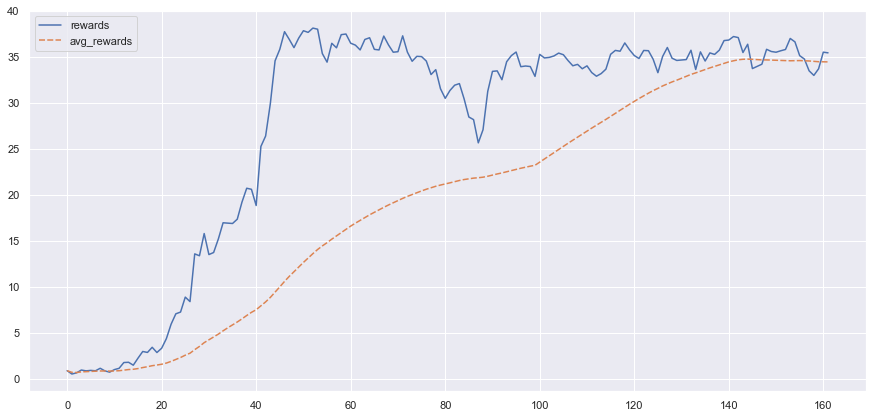

In [23]:
sns.lineplot(data=df_rewards)